In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
temporary_results_path = '/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/temporary results'

processed_dataset_path = os.path.join(temporary_results_path, 'processed_dataset.csv')

In [3]:
full_df = pd.read_csv(processed_dataset_path)

In [4]:
ecoli_df = full_df.copy()
coliform_df = full_df.copy()

In [5]:
ecoli_df.drop(columns=["Coliform (1ml)_mean"], inplace=True)
coliform_df.drop(columns=["Ecoli (1ml)_mean"], inplace=True)

In [6]:
ecoli_df["isTNTC"] = np.where(
    (ecoli_df["Ecoli (1ml)_mean"] == "TNTC"),
    1,
    0,
)

coliform_df["isTNTC"] = np.where(
    (coliform_df["Coliform (1ml)_mean"] == "TNTC"),
    1,
    0,
)

## Ecoli - Classification

In [7]:
class_ecoli_df = ecoli_df[['Site', 'Temp C_mean', 'Ph_mean', 'Cond (ms)_mean', 'isTNTC']]

class_ecoli_df['isTNTC'] = class_ecoli_df['isTNTC'].astype('category')

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_5755/309380321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_ecoli_df['isTNTC'] = class_ecoli_df['isTNTC'].astype('category')


In [8]:
for site in class_ecoli_df['Site'].unique():
    fig = px.scatter_3d(class_ecoli_df[class_ecoli_df['Site'] == site], x='Temp C_mean', y='Ph_mean', z='Cond (ms)_mean', color='isTNTC')
    fig.update_layout(title_text="Site: " + site + ', ' + 'Count: ' + str(len(class_ecoli_df[class_ecoli_df['Site'] == site])))

    fig.add_annotation()
    fig.show()

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Unique Model

In [9]:
class_ecoli_df.drop(columns=['Site'], inplace=True)
class_ecoli_df.dropna(inplace=True)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_5755/2661984846.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_5755/2661984846.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
X = class_ecoli_df.drop(columns=['isTNTC'])
y = class_ecoli_df['isTNTC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

logreg = LogisticRegression()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()

In [11]:
logreg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)
naive_bayes_pred = naive_bayes.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)

In [12]:
print("Logistic Regression")
cf_matrix = confusion_matrix(y_test, logreg_pred)
clf_report = classification_report(y_test, logreg_pred, labels=[0, 1], target_names=['Not TNTC', 'TNTC'], output_dict=True)
acc_score = accuracy_score(y_test, logreg_pred)


Logistic Regression


/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

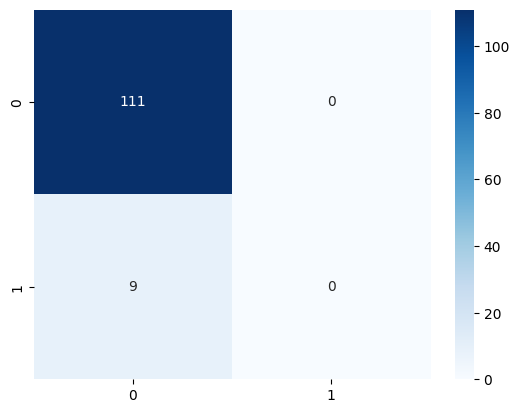

In [13]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

<Axes: >

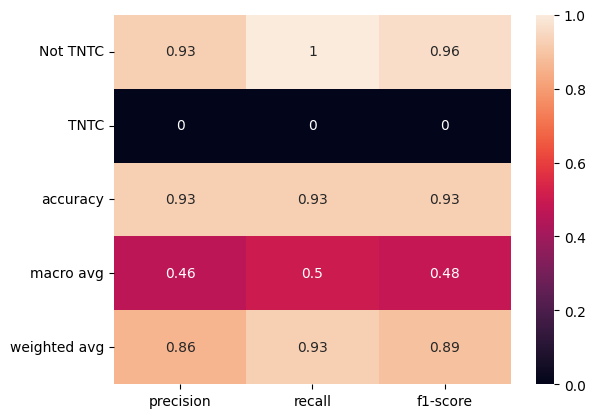

In [14]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [15]:
print('Accuracy: ',  acc_score)

Accuracy:  0.925


In [16]:
print("Naive Bayes")
cf_matrix = confusion_matrix(y_test, naive_bayes_pred)
clf_report = classification_report(y_test, naive_bayes_pred, labels=[0, 1], target_names=['Not TNTC', 'TNTC'], output_dict=True)
acc_score = accuracy_score(y_test, naive_bayes_pred)

Naive Bayes


/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

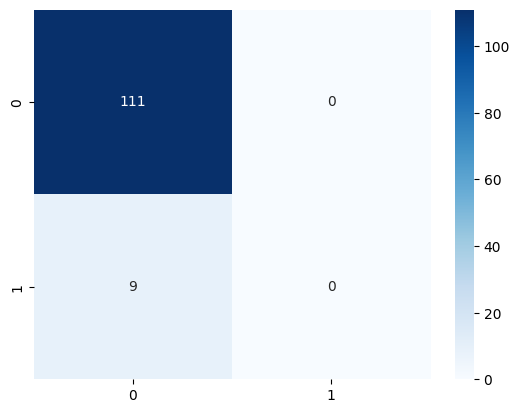

In [17]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

<Axes: >

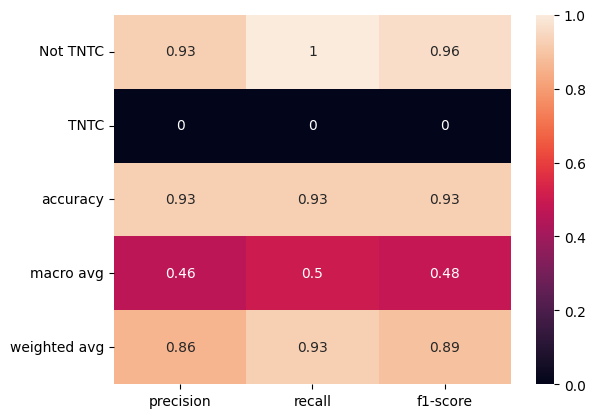

In [18]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [19]:
print('Accuracy: ',  acc_score)

Accuracy:  0.925


In [20]:
print("Decision Tree")
cf_matrix = confusion_matrix(y_test, decision_tree_pred)
clf_report = classification_report(y_test, decision_tree_pred, labels=[0, 1], target_names=['Not TNTC', 'TNTC'], output_dict=True)
acc_score = accuracy_score(y_test, decision_tree_pred)

Decision Tree


<Axes: >

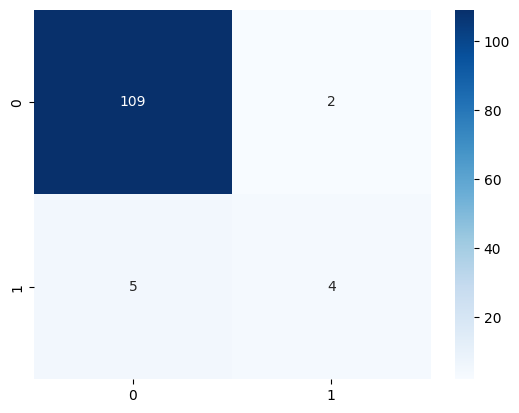

In [21]:
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

<Axes: >

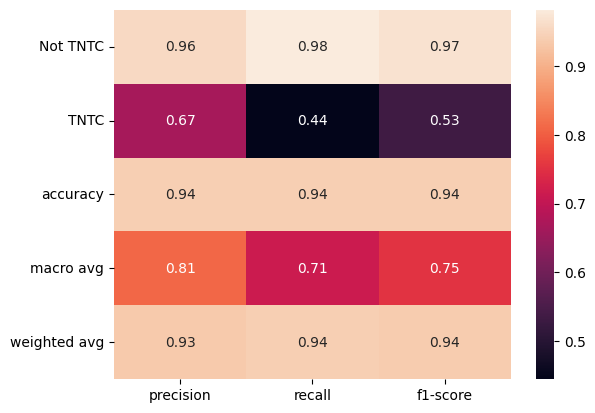

In [22]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [23]:
print('Accuracy: ',  acc_score)

Accuracy:  0.9416666666666667
